## Sentiment analysis of Yelp reviews

Yelp, an American multinational company was founded in 2004 and it crowd-sources reviews about businesses. Additionally, it also operates other domains: Yelp Reservations. As of December 2020, approximately 206.3 million reviews were available. The dataset is a subset of Yelp's business, reviews and user data. 

The data consists of 5261668 observations and 11 columns. The dataset is available at:[Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset/code?datasetId=10100&sortBy=commentCount). Each observation in this dataset is a review given by a particular user regarding a business. The major focus is with the 'stars' and 'text' columns. The 'stars' column is the number of stars ratings(1 to 5) given by the reviewer. The 'text' column includes the review given by the reviewer.

So,using this datasets this NLP project will try to find the sentiment of the review(in text) and assign either that belongs to 1 star or 5 star ratings.

## 1. Import libraries and data

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
from collections import Counter 
from wordcloud import WordCloud, STOPWORDS 
import random
import re 
import string
import nltk 

In [25]:
from datetime import datetime

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Import datasets
yelp = pd.read_csv('yelp_review.csv')

In [5]:
yelp.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [57]:
yelp.shape

(5261668, 11)

In [6]:
yelp.describe()

,stars,useful,funny,cool
count,5.261668e+06,5.261668e+06,5.261668e+06,5.261668e+06
mean,3.727739e+00,1.385085e+00,5.091961e-01,5.860917e-01
std,1.433593e+00,4.528727e+00,2.686168e+00,2.233706e+00
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00
max,5.000000e+00,3.364000e+03,1.481000e+03,1.105000e+03


## 2. Basic Exploratory Data Analysis

This section will incorporate some data visualizaiton and EDA to have an overview of the data. 

In [7]:
# checking for text length of text column
yelp['text_length'] = yelp['text'].apply(len)

In [8]:
yelp.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,text_length
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,213
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,502
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,373
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,523
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,231


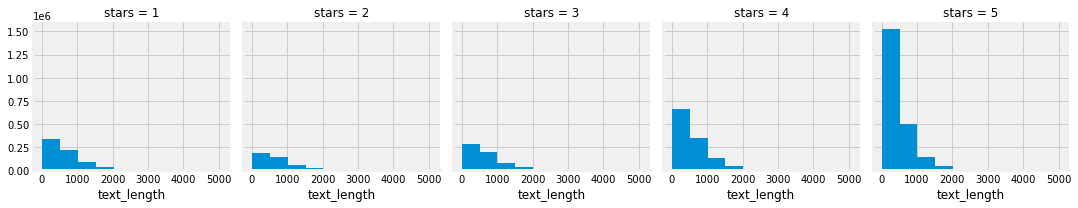

In [14]:
# Checking for text length and stars
hist = sns.FacetGrid(yelp, col = 'stars')
hist.map(plt.hist, 'text_length')

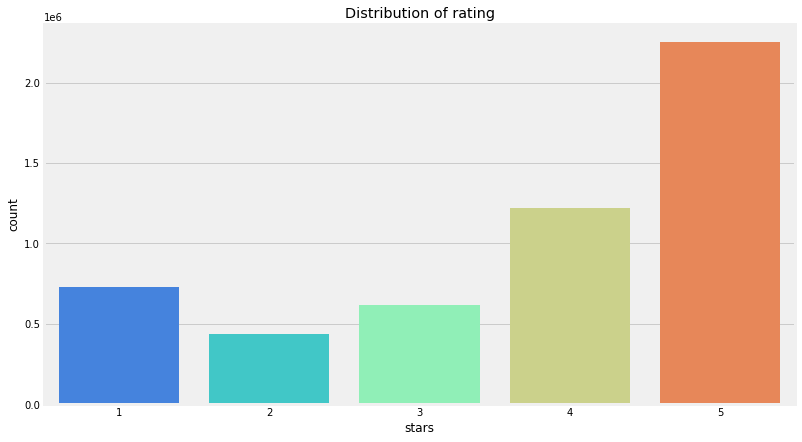

In [19]:
#distribution of ratings
plt.figure(figsize=(12,7))
sns.countplot(x='stars', data = yelp, palette = 'rainbow')
plt.title('Distribution of rating');

It is interesting, 5 star ratings exceeds all other ratings. 

<AxesSubplot:xlabel='stars', ylabel='text_length'>

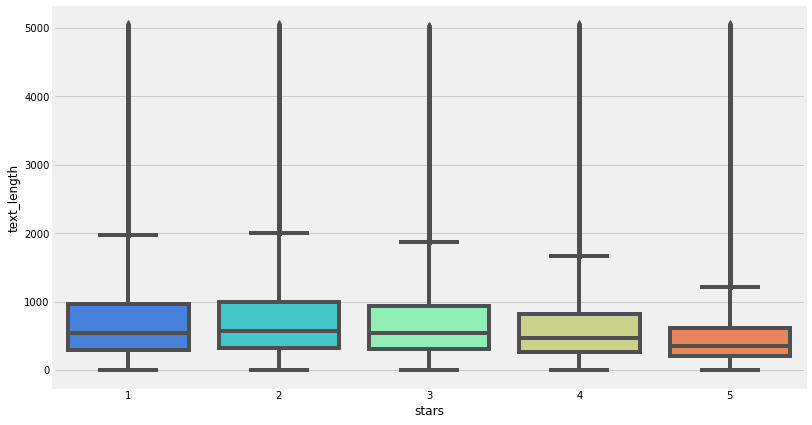

In [58]:
# checking the distribution with boxplot
plt.figure(figsize=(12,7))
sns.boxplot(x = 'stars', y='text_length', data = yelp, palette = 'rainbow')

In [20]:
# checking for corr matrix
stars = yelp.groupby('stars').mean()
stars

,useful,funny,cool,text_length
stars,,,,
1,2.210875,0.707292,0.279544,764.181383
2,1.625610,0.668248,0.415523,769.211320
3,1.341018,0.614906,0.646093,716.108068
4,1.349785,0.567573,0.824651,631.355725
5,1.101492,0.353408,0.572854,492.783366


In [21]:
#correlation matrix
stars.corr()

,useful,funny,cool,text_length
useful,1.000000,0.797196,-0.767887,0.750374
funny,0.797196,1.000000,-0.442860,0.981430
cool,-0.767887,-0.442860,1.000000,-0.503737
text_length,0.750374,0.981430,-0.503737,1.000000


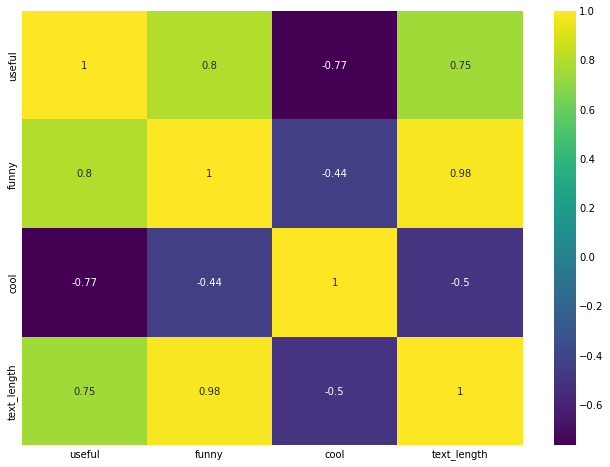

In [24]:
# Creating heatmap
plt.figure(figsize=(10,8))
norm = np.random.randn(10,12)
sns.heatmap(stars.corr(), cmap='viridis', annot = True)
plt.show()

In [26]:
# Changing the date column to date time format
yelp['date'] = pd.to_datetime(yelp['date'])

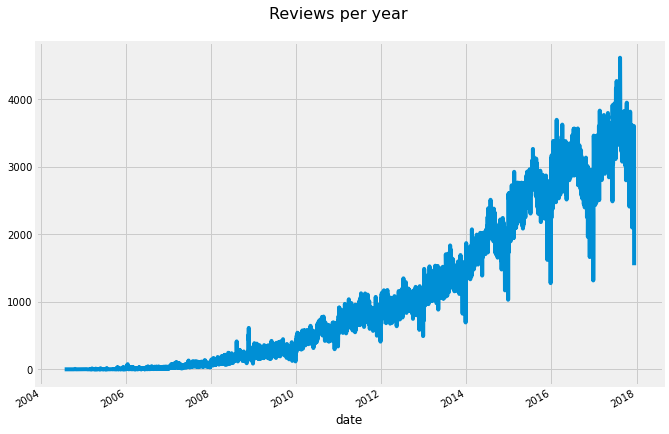

In [66]:
grp_date = yelp.groupby(['date'])['business_id'].count()

g = pd.Series(grp_date)
g.plot(kind='line', figsize=(10,7))
plt.suptitle('Reviews per year', size = 16, y =.95)
plt.show()

Using NLTK module to process text

In [29]:
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j).union(('thiswas','wasbad','thisis','wasgood','isbad','isgood','theres','there','dont','really','find'))

# this function remove punctuation, stopwords and returns the list of words
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  
    x = [w for w in x.split() if w not in set(stopwords)]  
    return ' '.join(x)


In [31]:
yelp['text_processed'] = yelp['text'].apply(preprocess)

In [32]:
yelp.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,text_length,text_processed
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,213,super simple place amazing nonetheless around ...
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,502,small unassuming place changes menu every ofte...
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,373,lesters located beautiful neighborhood since k...
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,523,love coming yes place always needs floor swept...
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,231,chocolate almond croissant amazing light butte...


In [33]:
# save the data to csv
yelp.to_csv('yelp_processed.csv')

In [35]:
# going further I need to truncate the datasize to 15% only so that I can run in my local machine.
# import the data and truncate to 15% randomly
p = 0.15  # sampling 15% of the data

yelp_p = pd.read_csv(
         'yelp_processed.csv',
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)

In [36]:
yelp_p.shape

(788484, 12)

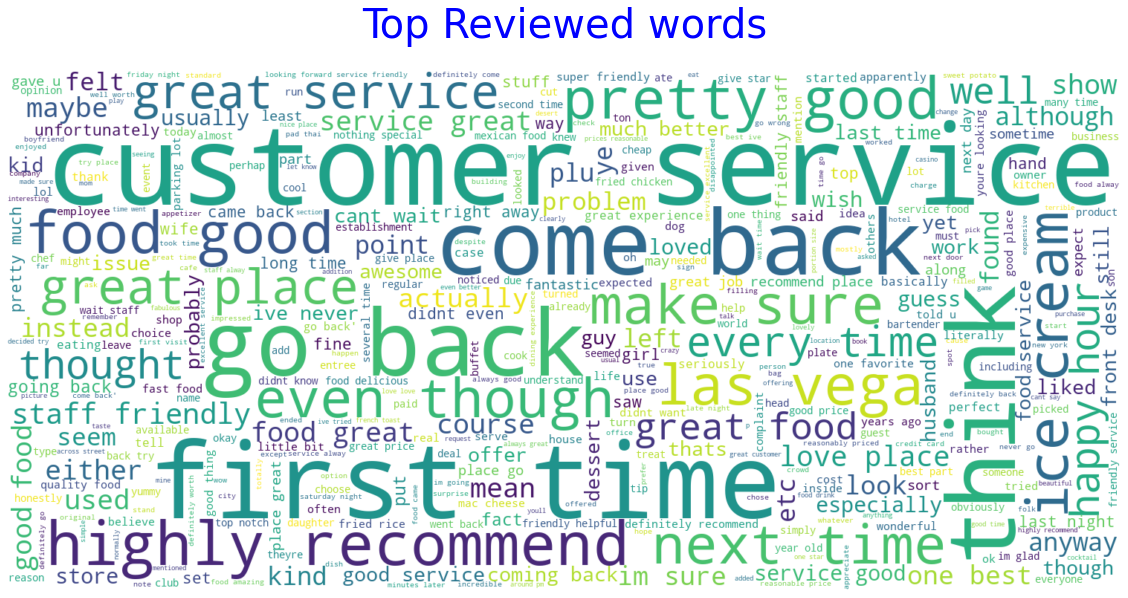

In [67]:
#generating word cloud to have an overview of top used words in the reviews dataset.
wordcloud = WordCloud(width=1500, height=700, random_state=44, max_words=400, background_color='white')
wordcloud.generate(str(set(yelp_p['text_processed'])))

#creating figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.suptitle('Top Reviewed words', size = 40, y =.95, color = 'Blue')
plt.show()

## 3. Classification task

In [40]:
# NLP classification task, for further analysis I will be using only one star and five star reviews 
#which indicates strong sentiments.

yelp_15 = yelp_p[(yelp_p.stars == 1)| (yelp_p.stars == 5)]

In [ ]:
# import modules that is necessary for further analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [41]:
# Now let's create two separate objects X and y.
# X = text columns of the data
# y = stars columns of the data
# text has been used not the text processed because we need to feed the raw reviewed input to find 
#what is the sentiment of the review.

X = yelp_15['text']
y = yelp_15['stars']

In [42]:
# importing countVectorizer and creating count vectorizer object
cv = CountVectorizer()

In [43]:
# pass X to fit in the CV
X = cv.fit_transform(X)

In [44]:
# Train Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=44)

In [45]:
## Training the model wiht naive bayes text classification
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [46]:
#prediction 
predictions = nb.predict(X_test)

In [48]:
print(confusion_matrix(y_test,predictions))
print('------'*10)
print(classification_report(y_test,predictions))

[[19575  2161]
 [ 3861 63827]]
------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.84      0.90      0.87     21736
           5       0.97      0.94      0.95     67688

    accuracy                           0.93     89424
   macro avg       0.90      0.92      0.91     89424
weighted avg       0.94      0.93      0.93     89424



Going further let's use TF-IDF vectorizer for penalizing the indiscriminate words and pipeline for ease

In [50]:
#build a pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()),('tfidf', TfidfTransformer()),('classifier', MultinomialNB()),])

In [51]:
# Train test split again
X = yelp_15['text']
y = yelp_15['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=44)

In [52]:
# fit the pipeline 
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [53]:
predictions = pipeline.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[15088  6648]
 [  483 67205]]
              precision    recall  f1-score   support

           1       0.97      0.69      0.81     21736
           5       0.91      0.99      0.95     67688

    accuracy                           0.92     89424
   macro avg       0.94      0.84      0.88     89424
weighted avg       0.92      0.92      0.92     89424



--> TF-IDF improved precision of 1 star and decreased the precision of 5 star<br>
--> F1-score has been decreased<br>
--> Overall, the model didn't performed well compared to the previous one.<br>

In [55]:
# Let's try with some parameter tuning
from sklearn.feature_extraction.text import TfidfVectorizer
X = yelp_15['text']
y = yelp_15['stars']

vectorizer = TfidfVectorizer(
    max_df=0.5, min_df=2, use_idf=True, norm=u'l2', smooth_idf=True)

# Applying the vectorizer
X = vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=44)

In [56]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

#prediction 
predictions = nb.predict(X_test)

print(confusion_matrix(y_test,predictions))
print('------'*10)
print(classification_report(y_test,predictions))

[[17011  4725]
 [  946 66742]]
------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.95      0.78      0.86     21736
           5       0.93      0.99      0.96     67688

    accuracy                           0.94     89424
   macro avg       0.94      0.88      0.91     89424
weighted avg       0.94      0.94      0.93     89424



After tuning, accuracy has been improved, precision improved for 1 star ratings but decreased for 5 star ratings as compared to the very first model.

<h1> <font color ='green'><center>THANKS !!!</font></center></h1>